In [135]:
import os
import argparse
import glob
import numpy as np
import pickle
import json
import cv2
import open3d as o3d
import matplotlib.pyplot as plt
from projection_utils import Projection
from data_parser import read_keypoints

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [136]:
# _____________ read frames _____________
data_root = 'D:/prox_data/recordings'
sequence_id = 'MPH8_00034_01'
save_root = '../temp_data/'

rgb_list = glob.glob(os.path.join(data_root, sequence_id, 'Color/*.jpg'))
rgb_list.sort()
# rgb_list[-1][-33:-30]
n_frame = int(rgb_list[-1][-33:-30])  # total frame number
# rgb_list
n_frame
# rgb_list[-1][-34:-4]

1

In [137]:
# _____________ init _____________
projection = Projection("D:/prox_data/calibration")
MAX_DEPTH = 20.0
depth_scale = 1e3       # TODO: determine depth_scale
point_cloud = o3d.geometry.PointCloud()
vis = o3d.visualization.Visualizer()
h = 1080
w = 1920

curr_frame = rgb_list[5]

In [138]:
projection.depth_cam

{'c': [253.83829093644025, 211.1372060737881],
 'f': [366.7400717166478, 366.74007078527524],
 'k': [0.09025264727976191,
  -0.26834827271526285,
  -1.8336023396332128e-10,
  2.304994910236695e-09,
  0.09528330866851589],
 'camera_mtx': [[366.7400717166478, 0.0, 253.83829093644025],
  [0.0, 366.74007078527524, 211.1372060737881],
  [0.0, 0.0, 1.0]],
 'view_mtx': [[-1.0,
   -1.547831979827037e-09,
   -1.0299632133215585e-08,
   4.4333090859474606e-10],
  [1.5478319446937772e-09,
   -1.0,
   3.4111179395206166e-09,
   -1.2372430425663552e-09],
  [-1.0299632138495422e-08,
   3.411117923578517e-09,
   1.0,
   -1.883818362618968e-08]],
 'R': [1.6178624334311548e-08, -5.358171519782183e-09, -3.141592655137625],
 'T': [4.4333090859474606e-10,
  -1.2372430425663552e-09,
  -1.883818362618968e-08]}

In [139]:
os.path.join(data_root, sequence_id, 'Depth/' + curr_frame[-34:-4] + '.png')

'D:/prox_data/recordings\\MPH8_00034_01\\Depth/s001_frame_00006__00.00.00.177.png'

In [140]:
foo = os.path.join(r'D:/prox_data/recordings/MPH8_00168_01/Depth', 's001_frame_00006__00.00.00.174' + '.png')
foo
os.path.exists(foo)

'D:/prox_data/recordings/MPH8_00168_01/Depth\\s001_frame_00006__00.00.00.174.png'

True

In [167]:
# curr_frame[-34:-4] = 's001_frame_00006__00.00.00.186'
foo = os.path.join(r'D:/prox_data/recordings/MPH8_00168_01/Depth', 's001_frame_00006__00.00.00.174' + '.png')
foo
os.path.exists(foo)

depth_img = cv2.imread(foo, flags=-1).astype(float)

depth_img = cv2.flip(depth_img, 1)

depth_aligned = depth_img

calib_dir = r'D:/prox_data/calibration'
proj = Projection(calib_dir=calib_dir)

# depth_raw = depth_img.copy()
# # depth_img /= 8.0
# # depth_img /= 1000.0


# depth_img = cv2.flip(depth_img, 1)
# depth_raw = cv2.flip(depth_raw, 1)

# depth_aligned = projection.align_depth2color(depth_img, depth_raw)


# depth_aligned = depth_aligned.astype(float)
# min = np.min(depth_aligned[depth_aligned > 0])
# depth_aligned = depth_aligned - min
# MAX_DEPTH = np.max(depth_aligned)
# depth_aligned[depth_aligned > MAX_DEPTH] = 0
# # depth_aligned /= 8.0
# # depth_aligned /= 1000.0
# plt.imshow(depth_aligned, cmap='plasma')
# plt.colorbar()
# plt.figure()

# plt.imshow(depth_img, cmap='plasma')
# plt.colorbar()
# plt.figure()

# plt.hist(depth_img[depth_img > 0].flatten())
# np.sum(depth_img == 0)
# np.sum(depth_img != 0)
# plt.figure()

# plt.hist(depth_aligned[depth_aligned > 0].flatten())
# plt.figure()
# plt.hist(depth_aligned.flatten())
# np.sum(depth_aligned == 0)
# np.sum(depth_aligned != 0)

'D:/prox_data/recordings/MPH8_00168_01/Depth\\s001_frame_00006__00.00.00.174.png'

True

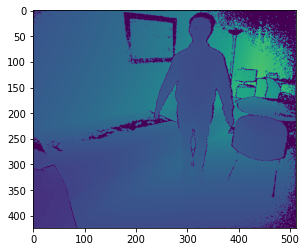

In [168]:
plt.imshow(depth_aligned)

(array([9.3060e+03, 9.4319e+04, 5.7313e+04, 1.8509e+04, 4.0920e+03,
        6.4250e+03, 5.8960e+03, 1.9000e+01, 7.0000e+00, 3.0000e+00]),
 array([ 7216. , 12599.2, 17982.4, 23365.6, 28748.8, 34132. , 39515.2,
        44898.4, 50281.6, 55664.8, 61048. ]),
 <BarContainer object of 10 artists>)

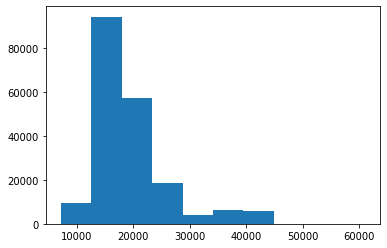

In [143]:
plt.hist(depth_aligned[depth_aligned > 0].flatten())

In [144]:
# _____________ read keypoints and skeleton (pickle) _____________
path = r'D:/prox_data/PROXD_fittings/MPH8_00168_01/results/s001_frame_00006__00.00.00.174/000.pkl'
with open(path, 'rb') as file:
    smpl = pickle.load(file, encoding='latin1')
smpl

{'camera_rotation': array([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]], dtype=float32),
 'camera_translation': array([[0., 0., 0.]], dtype=float32),
 'betas': array([[ 0.00374696, -2.1283567 ,  1.8193172 ,  0.25818276,  0.650099  ,
         -0.42449552,  0.6370358 ,  0.3441074 , -0.13002175, -0.6517306 ]],
       dtype=float32),
 'global_orient': array([[ 3.4879785 ,  0.10604832, -0.4093588 ]], dtype=float32),
 'transl': array([[0.267928  , 0.23929313, 1.9793904 ]], dtype=float32),
 'left_hand_pose': array([[ 0.2687249 , -0.6134145 ,  0.03265722, -0.0969364 ,  0.4284292 ,
          0.32945237,  0.11890141, -0.04197419, -0.10430387, -0.29033563,
          0.78230435, -0.2795663 ]], dtype=float32),
 'right_hand_pose': array([[ 0.33123404, -0.28775176,  0.6347041 ,  0.06891989,  0.618275  ,
         -0.23382418, -0.06792508,  0.24559225, -0.19839887, -0.11311837,
          0.28017527, -0.34219244]], dtype=float32),
 'jaw_pose': array([[-0.04149484,  0.00358265,  0.001048

In [ ]:
proj.

In [145]:
smplx_model_path='../models_smplx_v1_1/models/smplx/SMPLX_NEUTRAL.pkl'
with open(smplx_model_path, 'rb') as file:
    out = pickle.load(file, encoding='latin1')

In [146]:
import torch

# specify device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


print('-- pytorch version={}'.format(torch.__version__))
print('-- device={}'.format(device))

smplx_model_path='../models_smplx_v1_1/models/'

import smplx  # SMPL-X; pip install smplx

def get_smplx_model(gender, device):
    body_model_path = smplx_model_path
    body_model = smplx.create(body_model_path, 
                          model_type='smplx',        ## smpl, smpl+h, or smplx?
                          gender=gender, ext='npz',  ## file format 
                          num_pca_comps=12,          ## MANO hand pose pca component
                          create_global_orient=True, 
                          create_body_pose=True,
                          create_betas=True,
                          create_left_hand_pose=True,
                          create_right_hand_pose=True,
                          create_expression=True, 
                          create_jaw_pose=True,
                          create_leye_pose=True,
                          create_reye_pose=True,
                          create_transl=True,
                          batch_size=1               ## how many bodies in a batch?
                          )
    body_model.eval()
    return body_model

smplx_neutral = get_smplx_model(gender='neutral', device=device)


def draw_bodies(gender, betas, thetas):
    bm = smplx_neutral


    ## read verts and face from smplx model
    params = {'betas': betas,
              'body_pose': thetas
              }


    verts = bm(return_verts=True, **params).vertices.detach().cpu().numpy()[0]
    faces = bm.faces

    ## put verts and face into open3d, and compute surface normal
    coord = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5)
    body = o3d.geometry.TriangleMesh()
    body.vertices = o3d.utility.Vector3dVector(verts)
    body.triangles = o3d.utility.Vector3iVector(faces)
    body.vertex_normals = o3d.utility.Vector3dVector([])
    body.triangle_normals = o3d.utility.Vector3dVector([])
    body.compute_vertex_normals()
    o3d.visualization.draw_geometries([body, coord])
    
    return None


-- pytorch version=1.10.0
-- device=cpu


In [147]:
data = smpl
betas = torch.Tensor(data['betas']).reshape(1, -1)
body_pose = torch.Tensor(data['body_pose'])
global_orient= torch.Tensor(data['global_orient'])
transl=torch.Tensor(data['transl'])
out = smplx_neutral(return_joints=True, betas=betas, body_pose=body_pose, global_orient=global_orient, transl=transl)
joints = out.joints[:, :21].squeeze()
joint_locations = joints.detach().cpu().numpy()
body_joints_3d = (out.vertices.detach().cpu().numpy().squeeze())

In [148]:
body_joints_3d.shape

(10475, 3)

In [149]:
with open('D:/prox_data/calibration/IR.json') as f:
        camera_ir = json.load(f) 
with open('D:/prox_data/calibration/Color.json') as f:
        camera_rgb = json.load(f) 

(array([2.11990e+04, 7.77500e+03, 1.02371e+05, 5.60080e+04, 1.37350e+04,
        5.67900e+03, 9.69700e+03, 6.09000e+02, 1.20000e+01, 3.00000e+00]),
 array([    0. ,  6104.8, 12209.6, 18314.4, 24419.2, 30524. , 36628.8,
        42733.6, 48838.4, 54943.2, 61048. ]),
 <BarContainer object of 10 artists>)

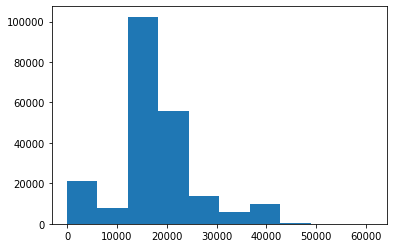

In [150]:
plt.hist(depth_aligned.flatten())

In [151]:
proj_points.shape 
np.sum(depth_aligned == 0)
points.shape
217088 - 21199

(195889, 3)

21199

(195889, 3)

195889

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

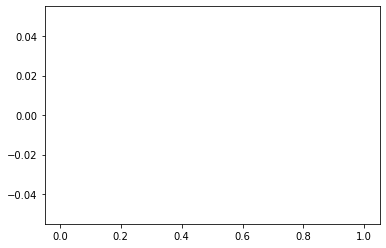

In [152]:
norms = np.linalg.norm(proj_points, axis=1)
plt.hist(norms[norms < 1.0])

<Figure size 432x288 with 0 Axes>

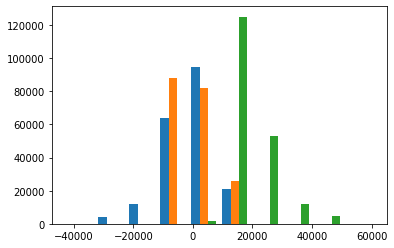

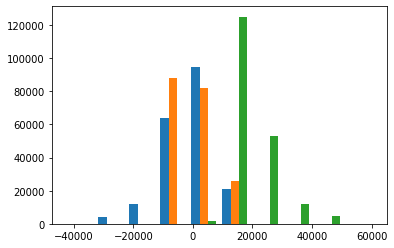

In [153]:
_ = plt.hist(proj_points.reshape(-1, 3))
plt.figure()
_ = plt.hist(points)

In [154]:
proj_points = proj.unproject_depth_image(depth_aligned, proj.depth_cam).reshape(-1, 3)
proj_points.shape
norms = np.linalg.norm(proj_points, axis=1)
proj_points = proj_points[norms > 1.0]
proj_points.shape
dists = np.linalg.norm(proj_points - points, axis=1)


(217088, 3)

(195889, 3)

In [155]:
proj_points.shape
points.shape
proj_points[proj_points != np.array([0., 0., 0.])].shape
# temp = points - proj_points.reshape((-1, 3))
# temp_dists = np.linalg.norm(temp, axis=1)

(195889, 3)

(195889, 3)

(587667,)

(array([[1.60000e+01, 4.25500e+03, 1.17250e+04, 6.41070e+04, 9.45080e+04,
         2.12780e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 1.00000e+00, 8.80690e+04, 8.20420e+04,
         2.55950e+04, 1.73000e+02, 9.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.45500e+03,
         1.25082e+05, 5.31470e+04, 1.16980e+04, 4.49700e+03, 1.00000e+01]]),
 array([-43270.29989662, -32838.46995899, -22406.64002136, -11974.81008372,
         -1542.98014609,   8888.84979154,  19320.67972918,  29752.50966681,
         40184.33960444,  50616.16954207,  61047.99947971]),
 <a list of 3 BarContainer objects>)

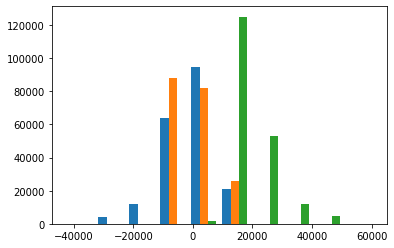

In [156]:
plt.hist(proj_points)

In [165]:
with open('D:/prox_data/calibration/IR.json') as f:
        camera_ir = json.load(f) 

scale= 8 * 1000.
camera_ir['f'][0] *= scale
camera_ir['f'][1] *= scale

camera_ir['camera_mtx'][0][0] *= scale
camera_ir['camera_mtx'][1][1] *= scale



In [164]:
proj.depth_cam

{'c': [253.83829093644025, 211.1372060737881],
 'f': [366.7400717166478, 366.74007078527524],
 'k': [0.09025264727976191,
  -0.26834827271526285,
  -1.8336023396332128e-10,
  2.304994910236695e-09,
  0.09528330866851589],
 'camera_mtx': [[366.7400717166478, 0.0, 253.83829093644025],
  [0.0, 366.74007078527524, 211.1372060737881],
  [0.0, 0.0, 1.0]],
 'view_mtx': [[-1.0,
   -1.547831979827037e-09,
   -1.0299632133215585e-08,
   4.4333090859474606e-10],
  [1.5478319446937772e-09,
   -1.0,
   3.4111179395206166e-09,
   -1.2372430425663552e-09],
  [-1.0299632138495422e-08,
   3.411117923578517e-09,
   1.0,
   -1.883818362618968e-08]],
 'R': [1.6178624334311548e-08, -5.358171519782183e-09, -3.141592655137625],
 'T': [4.4333090859474606e-10,
  -1.2372430425663552e-09,
  -1.883818362618968e-08]}

In [163]:
proj.depth_cam['camera_mtx']

[[366.7400717166478, 0.0, 253.83829093644025],
 [0.0, 366.74007078527524, 211.1372060737881],
 [0.0, 0.0, 1.0]]

In [166]:
proj_points = proj.unproject_depth_image(depth_aligned, camera_ir).reshape(-1, 3)
norms = np.linalg.norm(proj_points, axis=1)
eps = 1.0
proj_points = proj_points[norms > eps]
pcd = o3d.geometry.PointCloud()

proj_points[:, 2] /= scale
pcd.points = o3d.utility.Vector3dVector(proj_points)

o3d.visualization.draw_geometries([skeleton, pcd])

In [170]:
depth_img.shape

(424, 512)

In [169]:
# ################### get scene point could of cur_frame_N ###################
# rgb_im = cv2.imread(curr_frame)
# # rgb_im = rgb_im[:, :, ::-1]
# depth_im = cv2.imread(os.path.join(data_root, sequence_id, 'Depth/' + curr_frame[-34:-4] + '.png'), flags=-1)
# 
# rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
#     o3d.geometry.Image((np.asarray(rgb_im)).astype(np.uint8)),
#     o3d.geometry.Image((np.asarray(depth_aligned)).astype(np.float32)),
#     depth_trunc=MAX_DEPTH,
#     convert_rgb_to_intensity=False,
# )


with open('D:/prox_data/calibration/IR.json') as f:
        camera_ir = json.load(f) 

scale= 8 * 1000.
camera_ir['f'][0] *= scale
camera_ir['f'][1] *= scale

o3d_depth_aligned = o3d.geometry.Image(depth_aligned.astype(np.float32))


# TODO alternative method seems equivalent but doesn't actually work?
# proj_points = proj.unproject_depth_image(depth_aligned, proj.depth_cam).reshape(-1, 3)
# norms = np.linalg.norm(proj_points, axis=1)
# eps = 1.0
# proj_points = proj_points[norms > eps]
# pcd = o3d.geometry.PointCloud()

# TODO figure out if depth_scale, depth_trunc necessary
pcd = o3d.geometry.PointCloud.create_from_depth_image(
    o3d_depth_aligned,
    o3d.camera.PinholeCameraIntrinsic(w, h, camera_ir['f'][0], camera_ir['f'][1], camera_ir['c'][0], camera_ir['c'][1]),
    # depth_scale=1000.,
    # o3d.camera.PinholeCameraIntrinsic(w, h),
)  # cam coordinate

points = np.asarray(pcd.points)


points[:, 2] /= scale
pcd.points = o3d.utility.Vector3dVector(points)



from pytorch3d import transforms
R1 = np.array(camera_ir['R'])
# equivalent seems
# R1 = np.array(transforms.euler_angles_to_matrix(torch.Tensor(R), convention='XYZ'))
R1, _ = cv2.Rodrigues(R1)
# same
T1 = np.array(camera_ir['T'])

R2 = np.array(camera_rgb['R'])
# equivalent seems
# R1 = np.array(transforms.euler_angles_to_matrix(torch.Tensor(R), convention='XYZ'))
R2, _ = cv2.Rodrigues(R2)
# same
T2 = np.array(camera_rgb['T'])


points_color_aligned = (R2 @ (R1.T @ (points - T1).T)).T + T2
pcd_color_aligned = o3d.geometry.PointCloud()
pcd_color_aligned.points = o3d.utility.Vector3dVector(points_color_aligned)

# scene_verts = np.asarray(pcd.points)     # [h*w, 3], coordinate of each pixel in the depth map
# scene_verts_aug = np.hstack([scene_verts, np.ones([scene_verts.shape[0], 1])])
# with open('D:/prox_data/cam2world/MPH8.json') as f:
#         camera_ext = json.load(f)
# cam_extr_ref = np.linalg.inv(camera_ext)
# scene_verts = scene_verts_aug.dot(cam_extr_ref)[:, :3]      # camera to world transformation

# pcd.points = o3d.utility.Vector3dVector(scene_verts) # world coordinate


skeleton = o3d.geometry.PointCloud()
skeleton.points = o3d.utility.Vector3dVector(body_joints_3d)


o3d.visualization.draw_geometries([skeleton, pcd])

o3d.visualization.draw_geometries([skeleton, pcd_color_aligned])

# camera_ir['f'][0], camera_ir['f'][1]
# a, b = np.array(pcd.points), np.array(skeleton.points)
# a.mean(), b.mean()
# a.mean(axis=0)
# # plt.hist(b)
# # plt.figure()
# plt.hist(a)

(array([[9.00000e+00, 7.80000e+01, 6.64500e+03, 1.10570e+04, 4.29070e+04,
         6.89880e+04, 6.61730e+04, 3.20000e+01, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 6.46230e+04,
         7.73460e+04, 4.47670e+04, 9.09600e+03, 4.60000e+01, 1.00000e+01],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         1.95889e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]]),
 array([-43369.18268123, -35369.57671836, -27369.9707555 , -19370.36479263,
        -11370.75882977,  -3371.1528669 ,   4628.45309597,  12628.05905883,
         20627.6650217 ,  28627.27098456,  36626.87694743]),
 <a list of 3 BarContainer objects>)

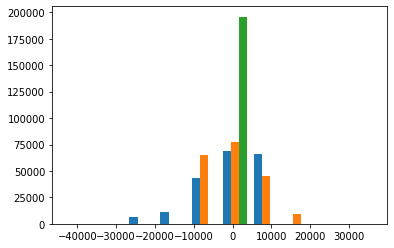

In [160]:
plt.hist(points_color_aligned)

In [132]:
a = np.min(skel_points, axis=0) - 0.1
b = np.max(skel_points, axis=0) + 0.1

temp = np.array([[0.1, -1.0, 1.6], [0.1, -0.5, 1.8], [-0.1, 0.8, 1.0]])
mask = np.array([np.all(x) for x in temp > a])
mask
temp[mask]
np.logical_and(np.array([False, True, True]), np.array([False, False, True]))

array([False,  True, False])

array([[ 0.1, -0.5,  1.8]])

array([False, False,  True])

In [58]:
valid = np.logical_and(points > a, points < b)
points_close = points[np.array([np.all(x) for x in points > a])]
points_close.shape
points.shape

(87988, 3)

(195889, 3)

In [59]:
skel_points = np.asarray(skeleton.points)
out = []
import tqdm

valid = np.logical_and(points > a, points < b)
points_close = points[np.array([np.all(x) for x in points > a])]

for p_skel in tqdm.tqdm(skel_points):
    out.append([])
    for p in points_close:
        out[-1].append(np.linalg.norm(p_skel- p))
distances_non_aligned = np.array(out)
# distances_non_aligned = np.array([[np.linalg.norm(p_skel- p) for p in points] for p_skel in skel_points])

  2%|▏         | 249/10475 [04:21<2:59:15,  1.05s/it]


KeyboardInterrupt: 

In [33]:
o3d.visualization.draw_geometries([skeleton, pcd])

(array([2.11990e+04, 7.77500e+03, 1.02371e+05, 5.60080e+04, 1.37350e+04,
        5.67900e+03, 9.69700e+03, 6.09000e+02, 1.20000e+01, 3.00000e+00]),
 array([ 0.    ,  6.1048, 12.2096, 18.3144, 24.4192, 30.524 , 36.6288,
        42.7336, 48.8384, 54.9432, 61.048 ]),
 <BarContainer object of 10 artists>)

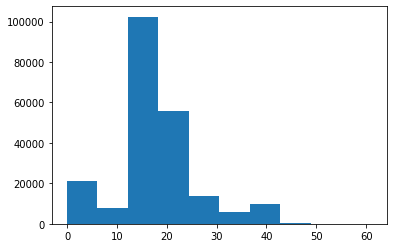

In [43]:
plt.hist(depth_aligned.flatten()/scale)

In [54]:
o3d.visualization.draw_geometries([skeleton, pcd])

In [39]:
o3d.__version__

'0.15.1'

In [28]:
# o3d.visualization.draw([{'name': 'pcd', 'geometry': pcd, 'material': material}], show_skybox=False)


(6149.239511505066, 0.5780720040536439)

(array([[   0.,    0., 1550., 7764., 1161.,    0.,    0.,    0.,    0.,
            0.],
        [5282., 1717., 2380.,  447.,  649.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0., 5842., 3585.,
         1048.]]),
 array([-0.88381946, -0.54307534, -0.20233121,  0.13841292,  0.47915704,
         0.81990117,  1.16064529,  1.50138942,  1.84213355,  2.18287767,
         2.5236218 ]),
 <a list of 3 BarContainer objects>)

<Figure size 432x288 with 0 Axes>

(array([[1.70000e+01, 5.22000e+03, 1.47850e+04, 7.00000e+04, 9.15220e+04,
         1.43450e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [4.00000e+00, 4.90000e+01, 1.73890e+04, 7.43220e+04, 1.04124e+05,
         1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.90100e+03,
         1.30741e+05, 4.22170e+04, 1.24990e+04, 3.52200e+03, 9.00000e+00]]),
 array([-40968.15090393, -30766.53581354, -20564.92072315, -10363.30563275,
          -161.69054236,  10039.92454803,  20241.53963843,  30443.15472882,
         40644.76981921,  50846.38490961,  61048.        ]),
 <a list of 3 BarContainer objects>)

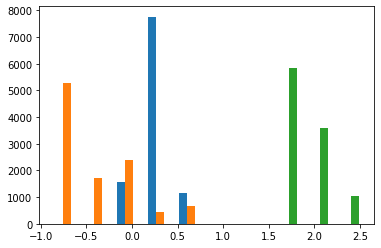

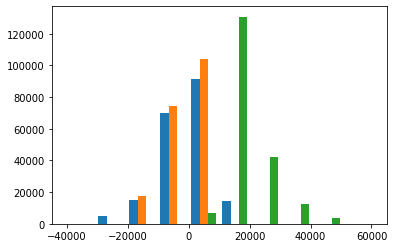

In [29]:
a, b = np.array(pcd.points), np.array(skeleton.points)
a.mean(), b.mean()
# plt.hist(b)
# plt.figure()
plt.hist(a)

(6149.239511505066, 0.5780720040536439)

(array([[   0.,    0., 1550., 7764., 1161.,    0.,    0.,    0.,    0.,
            0.],
        [5282., 1717., 2380.,  447.,  649.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0., 5842., 3585.,
         1048.]]),
 array([-0.88381946, -0.54307534, -0.20233121,  0.13841292,  0.47915704,
         0.81990117,  1.16064529,  1.50138942,  1.84213355,  2.18287767,
         2.5236218 ]),
 <a list of 3 BarContainer objects>)

<Figure size 432x288 with 0 Axes>

(array([[1.70000e+01, 5.22000e+03, 1.47850e+04, 7.00000e+04, 9.15220e+04,
         1.43450e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [4.00000e+00, 4.90000e+01, 1.73890e+04, 7.43220e+04, 1.04124e+05,
         1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.90100e+03,
         1.30741e+05, 4.22170e+04, 1.24990e+04, 3.52200e+03, 9.00000e+00]]),
 array([-40968.15090393, -30766.53581354, -20564.92072315, -10363.30563275,
          -161.69054236,  10039.92454803,  20241.53963843,  30443.15472882,
         40644.76981921,  50846.38490961,  61048.        ]),
 <a list of 3 BarContainer objects>)

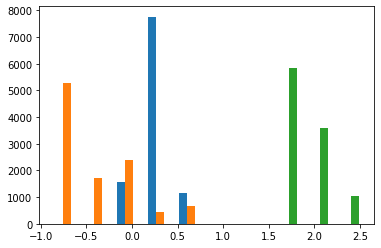

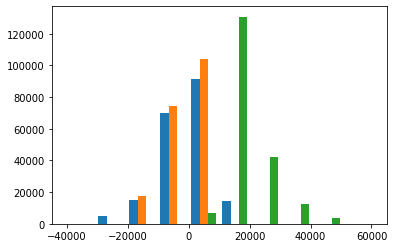

In [26]:
a, b = np.array(pcd.points), np.array(skeleton.points)
a.mean(), b.mean()
plt.hist(b)
plt.figure()
plt.hist(a)

(21, 3)

(array([[ 0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 7.,  5.,  3.,  2.,  4.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  6.]]),
 array([-0.72725713, -0.40971577, -0.09217439,  0.22536698,  0.5429084 ,
         0.86044973,  1.1779912 ,  1.4955325 ,  1.8130739 ,  2.1306152 ,
         2.4481566 ], dtype=float32),
 <a list of 3 BarContainer objects>)

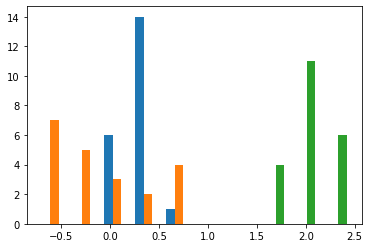

In [24]:
joint_locations.shape
plt.hist(joint_locations)

In [25]:
joint_distances = []
for j1 in joint_locations:
    joint_distances.append([])
    for j2 in joint_locations:
        joint_distances[-1].append(np.linalg.norm(j1 - j2))

joint_distances = np.array(joint_distances)

In [27]:
np.max(joint_distances)

1.5715686

In [18]:
distances = np.linalg.norm

(10475, 3)

In [19]:
camera_ir

{'c': [253.83829093644025, 211.1372060737881],
 'f': [366.7400717166478, 366.74007078527524],
 'k': [0.09025264727976191,
  -0.26834827271526285,
  -1.8336023396332128e-10,
  2.304994910236695e-09,
  0.09528330866851589],
 'camera_mtx': [[366.7400717166478, 0.0, 253.83829093644025],
  [0.0, 366.74007078527524, 211.1372060737881],
  [0.0, 0.0, 1.0]],
 'view_mtx': [[-1.0,
   -1.547831979827037e-09,
   -1.0299632133215585e-08,
   4.4333090859474606e-10],
  [1.5478319446937772e-09,
   -1.0,
   3.4111179395206166e-09,
   -1.2372430425663552e-09],
  [-1.0299632138495422e-08,
   3.411117923578517e-09,
   1.0,
   -1.883818362618968e-08]],
 'R': [1.6178624334311548e-08, -5.358171519782183e-09, -3.141592655137625],
 'T': [4.4333090859474606e-10,
  -1.2372430425663552e-09,
  -1.883818362618968e-08]}

In [60]:
LIMBS = [
(0, 1),  # head_center -> neck
(1, 2),  # neck -> right_clavicle
(2, 3),  # right_clavicle -> right_shoulder
(3, 4),  # right_shoulder -> right_elbow
(4, 5),  # right_elbow -> right_wrist
(1, 6),  # neck -> left_clavicle
(6, 7),  # left_clavicle -> left_shoulder
(7, 8),  # left_shoulder -> left_elbow
(8, 9),  # left_elbow -> left_wrist
(1, 10),  # neck -> spine0
(10, 11),  # spine0 -> spine1
(11, 12),  # spine1 -> spine2
(12, 13),  # spine2 -> spine3
(13, 14),  # spine3 -> spine4
(14, 15),  # spine4 -> right_hip
(15, 16),  # right_hip -> right_knee
(16, 17),  # right_knee -> right_ankle
(14, 18),  # spine4 -> left_hip
(18, 19),  # left_hip -> left_knee
(19, 20),  # left_knee -> left_ankle
]

In [62]:
joint_locations.shape

(21, 3)

(array([[0.0000e+00, 0.0000e+00, 4.8127e+04, 9.0476e+04, 4.3982e+04,
         9.9270e+03, 3.3640e+03, 1.3000e+01, 0.0000e+00, 0.0000e+00],
        [2.0000e+01, 2.6600e+03, 3.9330e+04, 8.9159e+04, 6.4720e+04,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1014e+04,
         1.4538e+05, 2.5283e+04, 1.2637e+04, 1.5660e+03, 9.0000e+00]]),
 array([-4.39289013, -3.19053034, -1.98817055, -0.78581076,  0.41654903,
         1.61890883,  2.82126862,  4.02362841,  5.2259882 ,  6.428348  ,
         7.63070779]),
 <a list of 3 BarContainer objects>)

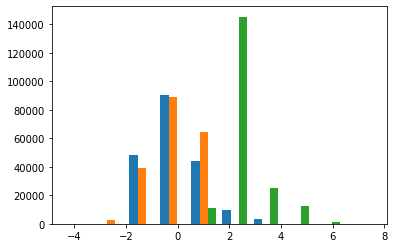

In [72]:
plt.hist(points_color_aligned)

In [63]:
# A = body_joints_3d[np.asarray(LIMBS)[:, 0]]  # [n_limb, 3]
# B = body_joints_3d[np.asarray(LIMBS)[:, 1]]  # [n_limb, 3]

A = joint_locations[np.asarray(LIMBS)[:, 0]]  # [n_limb, 3]
B = joint_locations[np.asarray(LIMBS)[:, 1]]  # [n_limb, 3]
n_pt = np.asarray(pcd_color_aligned.points).shape[0]
n_limb = A.shape[0]

A = np.tile(A, (n_pt, 1)).reshape(n_pt*n_limb, 3)  # [n_pt, n_limb, 3], n_pt=n_bps=scene_verts.shape[0]
B = np.tile(B, (n_pt, 1)).reshape(n_pt*n_limb, 3)
P = np.tile(np.asarray(pcd_color_aligned.points), n_limb).reshape(n_pt*n_limb, 3)

AB = B - A
AP = P - A
BP = P - B

temp_1 = np.multiply(AB, AP).sum(axis=-1)  # [n_pt, n_limb]
temp_2 = np.multiply(-AB, BP).sum(axis=-1)  # [n_pt, n_limb]
mask_1 = np.where(temp_1 <= 0)[0]   # angle between AB and AP >= 90
mask_2 = np.where((temp_1 > 0) * (temp_2 <= 0))[0]  # angle between AB and AP < 90 and angle between BA and BP >= 90
mask_3 = np.where((temp_1 > 0) * (temp_2 > 0))[0]   # angle between AB and AP < 90 and angle between BA and BP < 90
if len(mask_1) + len(mask_2) + len(mask_3) != n_pt*n_limb:
    print('[distance calculation] num of verts does not match!')

dist_1 = np.sqrt(np.sum((P[mask_1]-A[mask_1])**2, axis=-1))  # [n_mask_1]
dist_2 = np.sqrt(np.sum((P[mask_2]-B[mask_2])**2, axis=-1))  # [n_mask_2]

x = np.multiply(AB[mask_3], AP[mask_3]).sum(axis=-1) / np.multiply(AB[mask_3], AB[mask_3]).sum(axis=-1)  # [n_mask_3]
x = x.repeat(3).reshape(-1,3)
C = x * AB[mask_3] + A[mask_3]  # C: [n_mask_3, 3], the projected point of P on line segment AB
dist_3 = np.sqrt(np.sum((P[mask_3]-C)**2, axis=-1))  # n_mask_3

dist = np.zeros(n_pt*n_limb)
dist[mask_1] = dist_1
dist[mask_2] = dist_2
dist[mask_3] = dist_3
dist = dist.reshape(n_pt, n_limb)  # [n_pt, n_limb], distance from each point in scene verts to each limb
body_bps = np.min(dist, axis=-1)   # [n_pt]
body_bps.shape

(195889,)

(array([7.6586e+04, 9.8694e+04, 5.0340e+03, 5.8310e+03, 4.0130e+03,
        5.6990e+03, 1.0000e+01, 1.5000e+01, 5.0000e+00, 2.0000e+00]),
 array([1.72811831e-04, 8.10542559e-01, 1.62091231e+00, 2.43128205e+00,
        3.24165180e+00, 4.05202155e+00, 4.86239129e+00, 5.67276104e+00,
        6.48313079e+00, 7.29350053e+00, 8.10387028e+00]),
 <BarContainer object of 10 artists>)

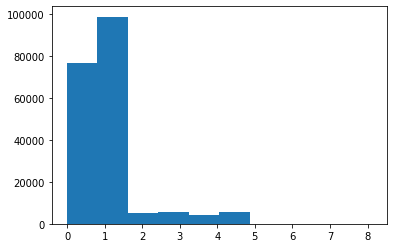

In [73]:
plt.hist(body_bps)

In [67]:
body_mask_fn = os.path.join(r'D:/prox_data/recordings/MPH8_00168_01/BodyIndexColor', 's001_frame_00006__00.00.00.174' + '.png')
body_mask = cv2.imread(body_mask_fn)
body_mask.shape

(1080, 1920, 3)

In [68]:
depth_aligned.shape

(424, 512)

In [70]:
a = depth_aligned.flatten()
np.sum(a == 0)
len(a)

21199

217088

In [77]:

# human_mask = cv2.imread(os.path.join(data_root, sequence_id, 'BodyIndexColor/' + curr_frame[-34:-4] + '.png'), cv2.IMREAD_GRAYSCALE)
# h = human_mask.shape[0]
# w = human_mask.shape[1]
# human_mask =np.flip(human_mask, axis=1)
# human_mask = human_mask.reshape(h*w)
# human_mask_ind = np.where(human_mask == 0)[0]

depth_mask_ind = np.where(depth_aligned.flatten() == 0.)[0]
# where we have points in the point cloud
depth_nomask_ind = np.asarray(list(set(range(h*w))-set(depth_mask_ind)))  # indices of nonmasked pixels
# TODO set sky mask where depth_aligned > MAX_DEPTH.
# depth_mask_sky_ind = ((depth_aligned.flatten() == 0) * (human_mask==False)).reshape(h*w)  # indices of sky

depth_mask_ind.shape
depth_nomask_ind.shape
h*w
body_bps.shape

(21199,)

(195889,)

217088

(195889,)

In [78]:
h = depth_aligned.shape[0]
w = depth_aligned.shape[1]


body_bps_full = np.zeros([h * w])
# body_bps_full[nomask_ind]
# body_bps_full
body_bps.shape
depth_nomask_ind.shape
body_bps_full.shape

(195889,)

(195889,)

(217088,)

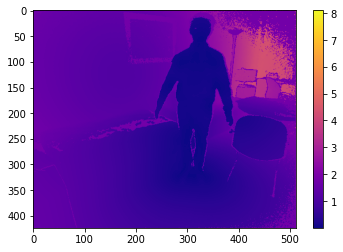

In [79]:
########### back to image plane, visualize bps feature map ###########
# print(cur_frame, cur_frame_N)
body_bps_full[depth_nomask_ind] = body_bps
body_bps_full[depth_mask_ind] = 1.8         # set masked pixels to 0
# body_bps_full[human_mask_ind] = 0.0
body_bps_full = body_bps_full.reshape((h, w))  # body bps feature map, [h, w]
body_bps_full = body_bps_full.astype(np.float32)
# np.save('{}/seq_{:04d}_fr_{:05d}.npy'.format(save_root, '/proximity/', curr_frame[-34:-4]), body_bps_full)
# np.save(save_root + '/first.png', body_bps_full)

plt.imshow(body_bps_full, cmap='plasma')
plt.colorbar()
plt.show()

# body_bps_full[body_bps_full>10] = 10
# fig = plt.imshow(body_bps_full, cmap='plasma', vmin=0, vmax=5)
# plt.axis('off')
# fig.axes.get_xaxis().set_visible(False)
# fig.axes.get_yaxis().set_visible(False)
# plt.imsave(save_root + '/first.png', body_bps_full, cmap='plasma')
# # plt.show()

In [71]:
body_bps.shape

(195889,)

(array([2.11990e+04, 3.14880e+04, 1.20904e+05, 2.70740e+04, 5.31100e+03,
        5.32600e+03, 5.75500e+03, 1.90000e+01, 9.00000e+00, 3.00000e+00]),
 array([1.8000000e+00, 7.9168066e+03, 1.5831813e+04, 2.3746820e+04,
        3.1661826e+04, 3.9576832e+04, 4.7491840e+04, 5.5406848e+04,
        6.3321855e+04, 7.1236859e+04, 7.9151867e+04], dtype=float32),
 <BarContainer object of 10 artists>)

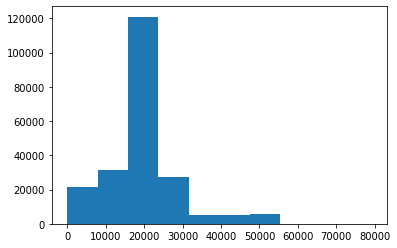

In [80]:
plt.hist(body_bps_full.flatten())